In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))
import scripts.visualizations as vis

In [2]:
training_data = pd.read_csv("../data/training_cleaned.csv")
test_data = pd.read_csv("../data/test_cleaned.csv")

 Distribution of Numerical Features


In [3]:
# Identify Categorical and Numerical Data
numerical_data = training_data.select_dtypes(include=['number'])
categorical_data = training_data.select_dtypes(include=['object'])

In [4]:
# Identify categorical and numerical clumns in the data 
print("Categorical data:", categorical_data.columns)
print("Numerical Data:", numerical_data.columns)

Categorical data: Index([], dtype='object')
Numerical Data: Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


Based on the output, the training dataset contains only numerical data, and no categorical data is present.

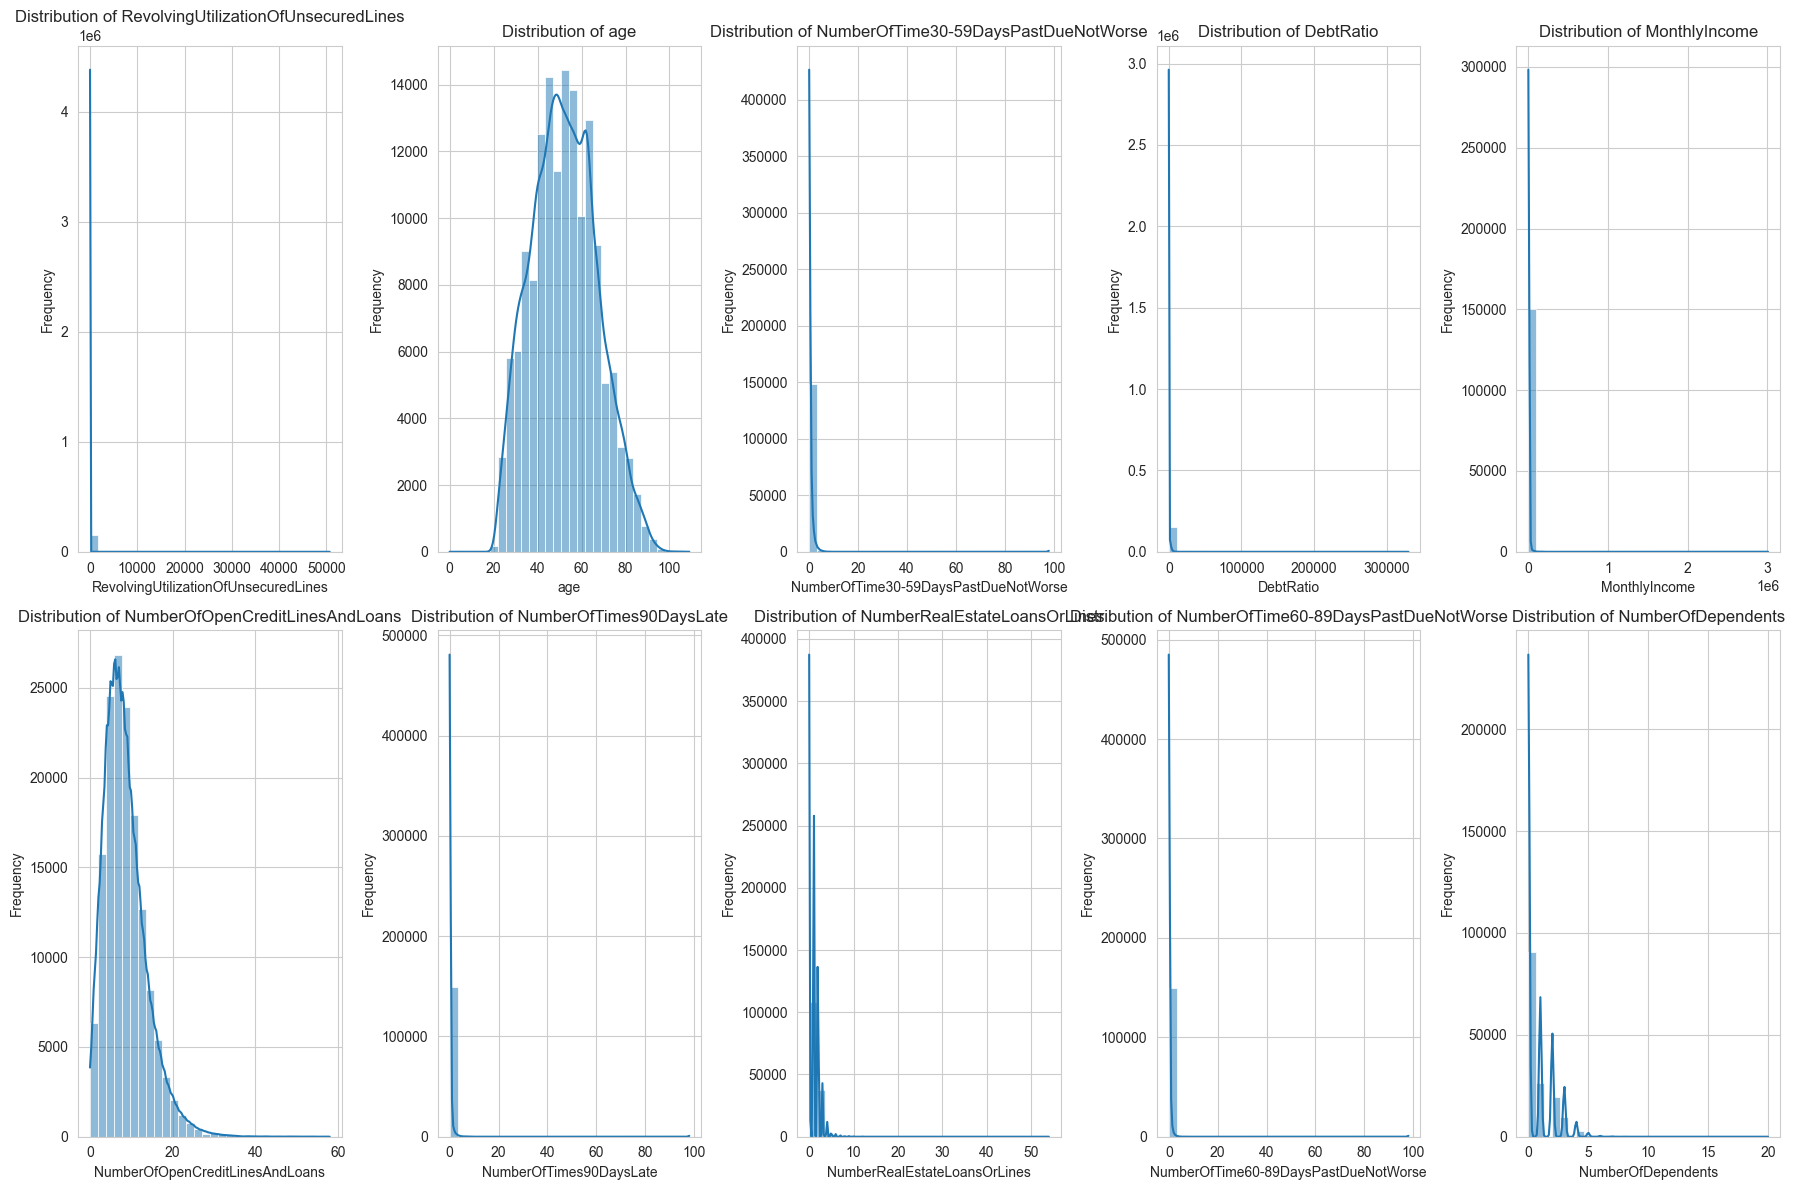

In [5]:
numerical_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
                     'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
# Distributions of numerical columns
vis.numerical_distribution(training_data, numerical_columns)

Correlation Analysis

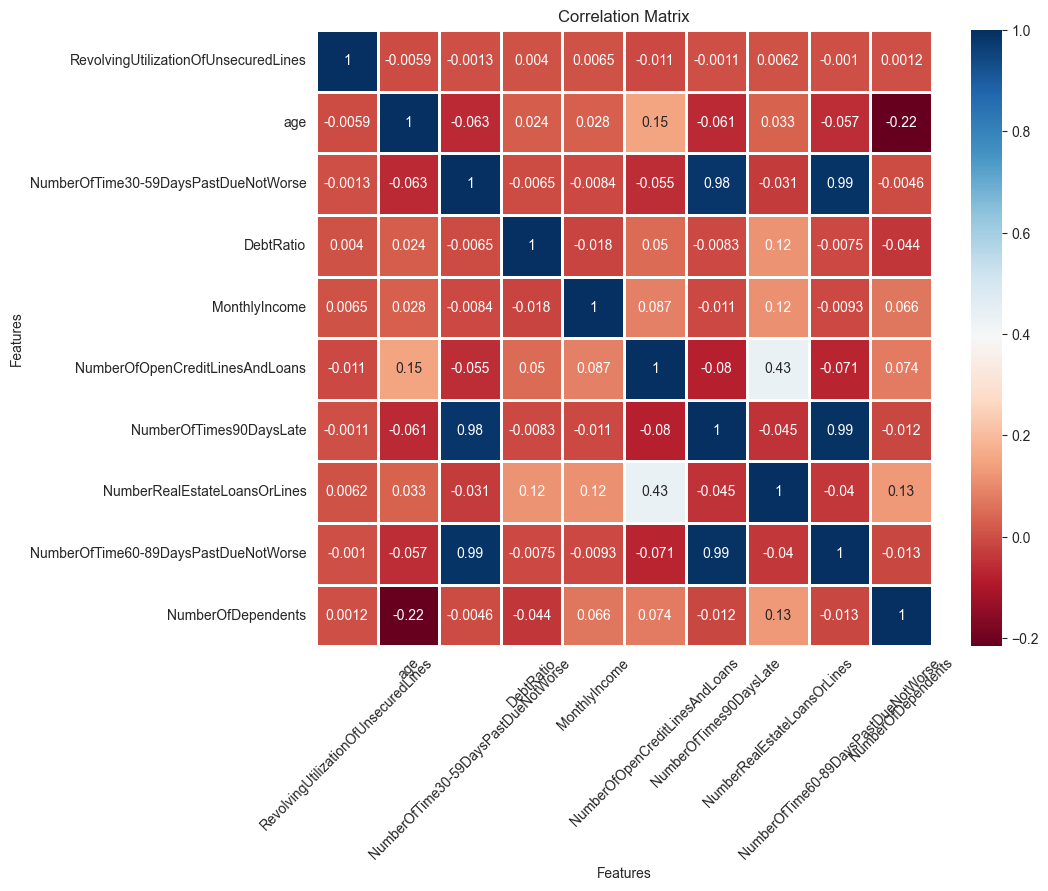

In [6]:
# Correlation analysis 
vis.correlation_analysis(training_data, numerical_columns)